In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
data = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/catmag_abserror_window_forwill.npy')
times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 24, 29, 34, 44, 54, 64, 74, 84, 94, 104, 114]
mags = data[0,:,0]
error = data[:,:,1]

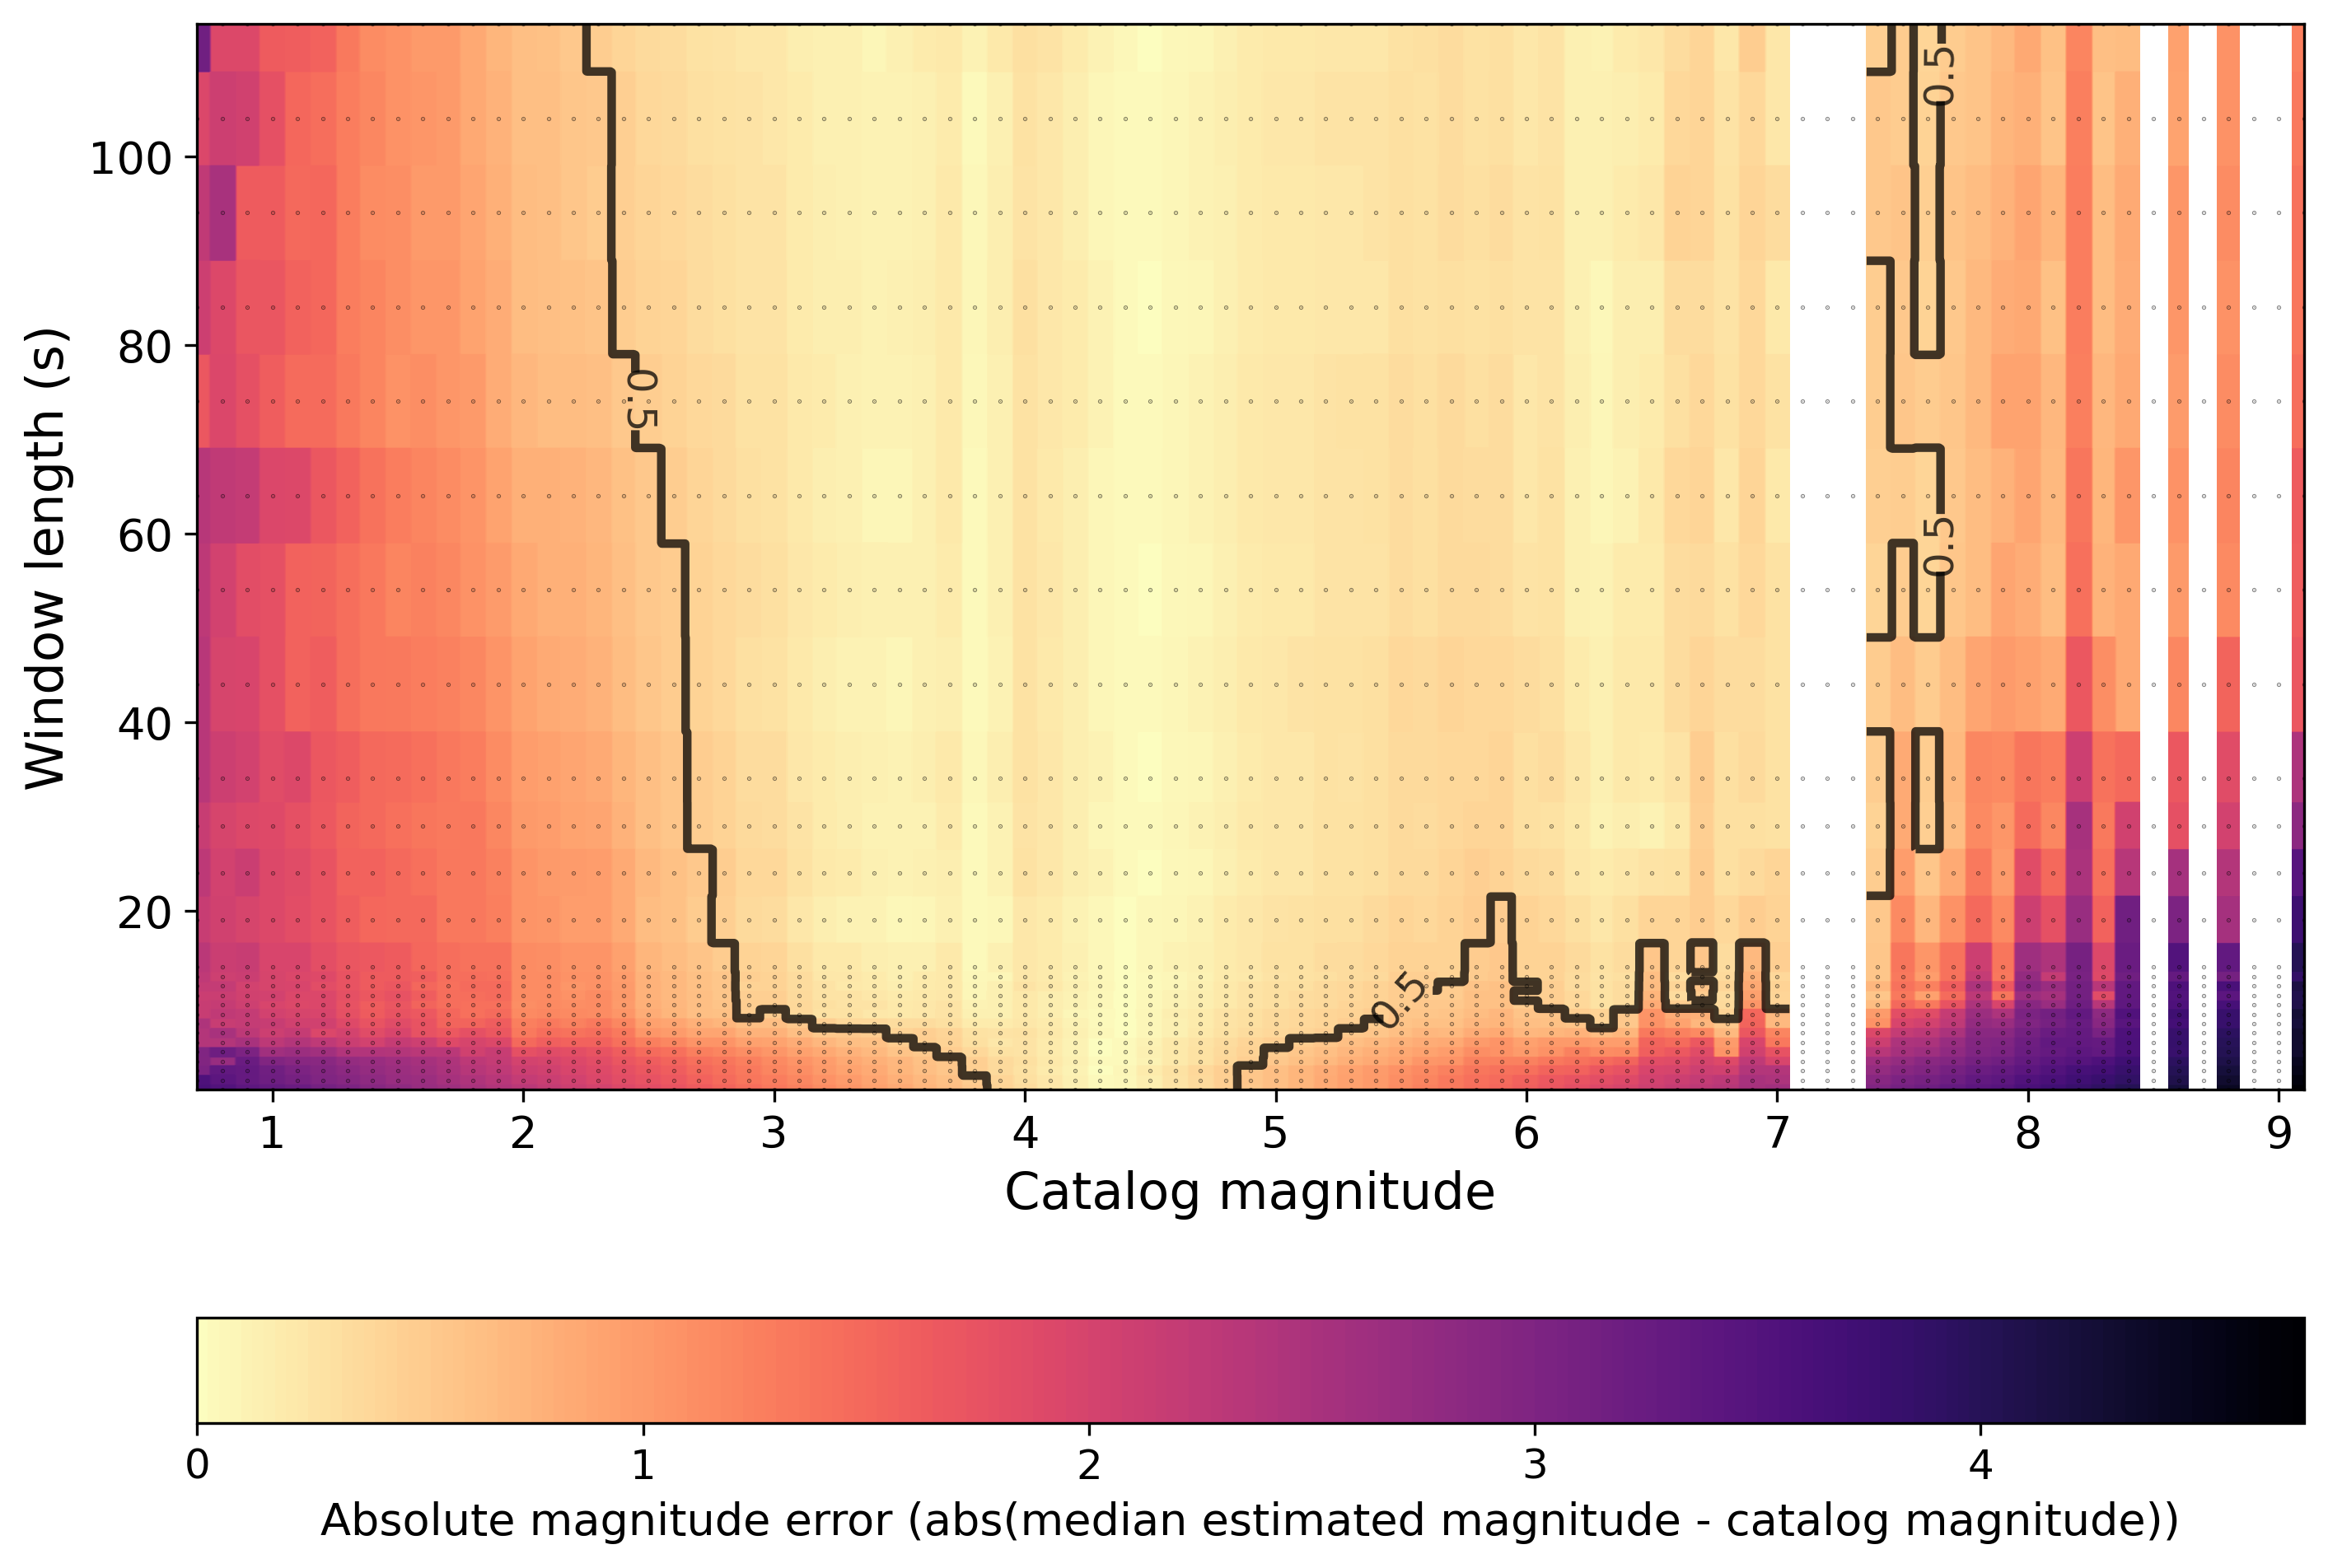

In [3]:
### ----- FIGURE 8 ----- ###

fig = plt.figure(figsize = (11, 8), dpi = 300)
ax = fig.add_subplot(111)

P = []
for xx in times:
    for yy in mags:
        P.append((yy, xx))

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

y = np.linspace(1.0, 114.0, 1000)
x = np.linspace(0.7, 10, 1000)
X, Y = np.meshgrid(x, y)
Ti = griddata(P, error.flatten(), (X, Y), method = 'nearest')
cb = ax.contourf(X, Y, Ti, cmap = 'magma_r', levels = 199)
cs = ax.contour(X, Y, Ti, origin = 'lower', levels = [0.5], colors = ['black'], linewidths = 2.5, alpha = 0.75)
manual_locations = [(2.5, 74), (5.5, 10), (7.65, 59), (7.6, 109)]
ax.clabel(cs, inline = True, fmt = fmt, manual = manual_locations, fontsize = 12)
xt, yt = zip(*P)
ax.plot(xt, yt, '.', color = 'black', alpha = 0.5, ms = 0.5)
ax.set_xlabel('Catalog magnitude', fontsize = 15)
ax.set_ylabel('Window length (s)', fontsize = 15)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)
cbar = fig.colorbar(cb, ticks = [0, 1, 2, 3, 4], orientation = 'horizontal')
cbar.ax.tick_params(labelsize = 12)
cbar.ax.set_xlabel(xlabel = 'Absolute magnitude error (abs(median estimated magnitude - catalog magnitude))', fontsize = 13)
ax.set_xlim(0.7, 9.1)
plt.show()
# plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/revised_figures/Fig8_errorheatmap.png', format = 'PNG')
# plt.close();
